In [1]:
# import library
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import statistics
import math
import pandas
import scipy.signal
# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_250_500.pkl",'rb') #signal
higgs = pickle.load(infile)

infile2 = open ("qcd_100000_pt_250_500.pkl",'rb')# background
qcd = pickle.load(infile2)

# list all keys of the files
print("Higgs Signal categories: ", higgs.keys())
print("QCD background categories: ", qcd.keys())

Higgs Signal categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
QCD background categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


**1. Make a stacked histogram plot for the feature variable: mass**
    
    Evaluate expected significance without any event   selection.
        - Use Poisson statistics for significance calculation
        - Compare your number of  NHiggs/(√NQCD) . If they  are equivalent, explain your findings.

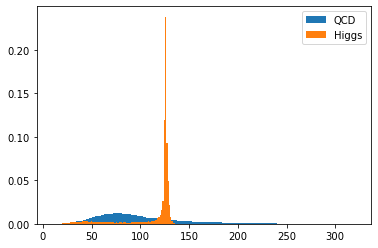

In [2]:
#1
qcdmass = qcd['mass'];
higgsmass = higgs['mass']
plt.hist(qcdmass, 100, label = 'QCD',density = 'true')
plt.hist(higgsmass, 100,stacked = True, label = 'Higgs', density = 'true')
plt.legend()
plt.show()

In [3]:
muqcd = 20000
muhiggs = 100
p1 = stats.poisson.cdf((muqcd+muhiggs), muqcd)
sigma = stats.norm.ppf(p1)
siga = 100/np.sqrt(muqcd)
print('The significance without any even selection is',sigma)
print('NHiggs/(√NQCD) is', siga)

The significance without any even selection is 0.7112259282313185
NHiggs/(√NQCD) is 0.7071067811865475


They are not equivalent.

**2. Identify mass cuts to optimize the expected significance.**
    
    - Try different mass cuts systematically
    - Evaluate expeced significance for each set of mass cuts
    - Identify the set of the mass cuts which give you the highest significance.

In [4]:
def masscut(lower, upper):
    qcd_after_cut = 100000 - (len(qcdmass[lower > qcdmass])+len(qcdmass[qcdmass > upper]))
    higgs_after_cut = 100000 - (len(higgsmass[lower > higgsmass])+len(higgsmass[higgsmass > upper]))
    qcd_mu = 20000 * (qcd_after_cut/len(qcdmass))
    higgs_mu = 100 * (higgs_after_cut/len(higgsmass))
    p2 = stats.poisson.cdf(qcd_mu+higgs_mu, qcd_mu)
    sigma2 = stats.norm.ppf(p2)
    return sigma2

In [5]:
sigtest = masscut(110, 131)
for i in range(20):
    sig = masscut(111 + i, 131)
    print([sig,i+111])

[1.7371954913187102, 111]
[1.7845065590245206, 112]
[1.836561275321396, 113]
[1.8883634769287512, 114]
[1.9476247275130276, 115]
[2.0194237772287456, 116]
[2.095300978544024, 117]
[2.163791016871927, 118]
[2.25359264493605, 119]
[2.341391947903496, 120]
[2.4234659412821093, 121]
[2.532190889684072, 122]
[2.6218824793670445, 123]
[2.6819756747659405, 124]
[2.47221414424148, 125]
[1.403891819542106, 126]
[0.8217412125430319, 127]
[0.5491701131594485, 128]
[0.32462126685480275, 129]
[0.17619652901802355, 130]


From above, we have significance of different cuts, I think the lower bound shoud be around 123. In order to find it, I will use three lower bounds which are 122, 123, 124 and I can find the upper bound which gives the greatest significantce value.

**A lower bound with value 122**

In [6]:
sigtest122 = masscut(122, 140)
for i in range(17):
    sig122 = masscut(122 , 139-i)
    print([sig122,140-i])

[1.9589585769916311, 140]
[1.9993327740517923, 139]
[2.051387060214739, 138]
[2.1233258468571714, 137]
[2.181714292665469, 136]
[2.275346989390833, 135]
[2.3491780097499615, 134]
[2.450007416999996, 133]
[2.532190889684072, 132]
[2.6374878758028846, 131]
[2.692156220574669, 130]
[2.6935775970561924, 129]
[2.5939758790792546, 128]
[2.1783055583608584, 127]
[0.9574762989973323, 126]
[0.3668698165446306, 125]
[0.18187011819474472, 124]


**A lower bound with value 123**

In [7]:
sigtest123 = masscut(123, 140)
for i in range(16):
    sig123 = masscut(123, 139 - i)
    print([sig123,140-i])

[2.0000033912959547, 140]
[2.0448212450963212, 139]
[2.102512689293164, 138]
[2.1529960997958453, 137]
[2.24862385981257, 136]
[2.322351746907904, 135]
[2.4071086051516817, 134]
[2.522432084999965, 133]
[2.6218824793670445, 132]
[2.7516642535732556, 131]
[2.832166976445661, 130]
[2.8645980478035016, 129]
[2.8005927074336725, 128]
[2.396255051671928, 127]
[1.0249290829677475, 126]
[0.4048846425630482, 125]


**A lower bound with value 124**

In [8]:
sigtest124 = masscut(124, 140)
for i in range(15):
    sig124 = masscut(124, 139 - i)
    print([sig124,140-i])

[1.9544954671830965, 140]
[2.030455869913388, 139]
[2.0927281312131085, 138]
[2.148388510132398, 137]
[2.2525175674286517, 136]
[2.3351398285003038, 135]
[2.4313998856088115, 134]
[2.5626779656513894, 133]
[2.6819756747659405, 132]
[2.8415597436728115, 131]
[2.9560007504111825, 130]
[3.0337389952368543, 129]
[3.032183893894291, 128]
[2.680060221998367, 127]
[1.1046188934935768, 126]


By comparing all the datas above, we can see that under the lower bound with value of 124 and the upper bound with the value of 129, there is a maximum value, indicating that the significance after the cut is 3.0337.

**3. Make stacked histogram plots for the reset of features**

    - Set A of plots without any event selection
        * Can you identify another feature as discriminative as mass feature (i.e. equal or better significance after feature cut)
        
    - Set B of plots with your optimal mass cuts
        * Can you identify additional feature to further imrpove expected signifiance?

In [9]:
masscut_qcd =  (qcd['mass'] <129) & (qcd['mass'] >124)
masscut_qcd_dict = qcd[masscut_qcd]
masscut_higgs = (higgs['mass'] <129) & (higgs['mass'] >124)
masscut_higgs_dict = higgs[masscut_higgs]

**pt**

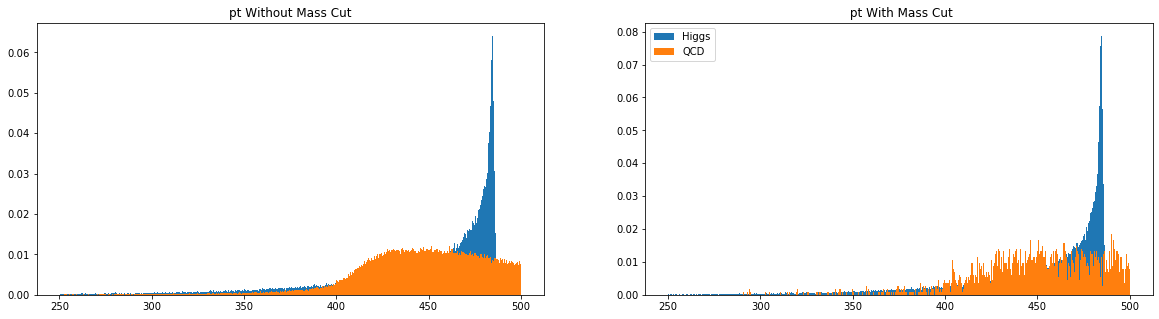

In [10]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('pt Without Mass Cut')
ax[0].hist(higgs['pt'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['pt'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' pt With Mass Cut')
ax[1].hist(masscut_higgs_dict['pt'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['pt'],500, label = 'QCD', density = 'true')
plt.legend()

**eta**

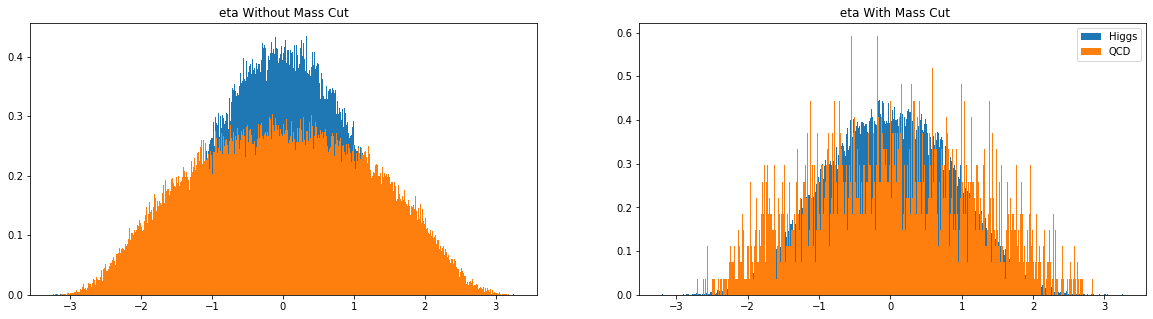

In [11]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('eta Without Mass Cut')
ax[0].hist(higgs['eta'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['eta'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' eta With Mass Cut')
ax[1].hist(masscut_higgs_dict['eta'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['eta'],500, label = 'QCD', density = 'true')
plt.legend()

**phi**

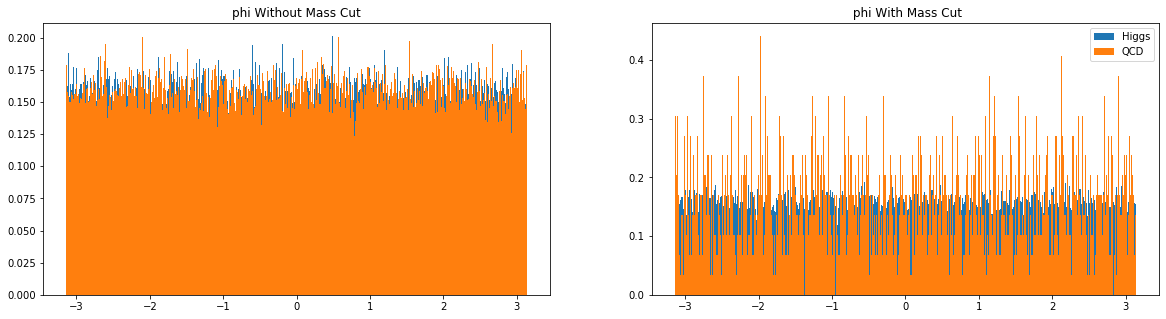

In [12]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('phi Without Mass Cut')
ax[0].hist(higgs['phi'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['phi'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' phi With Mass Cut')
ax[1].hist(masscut_higgs_dict['phi'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['phi'],500, label = 'QCD', density = 'true')
plt.legend()

**mass**

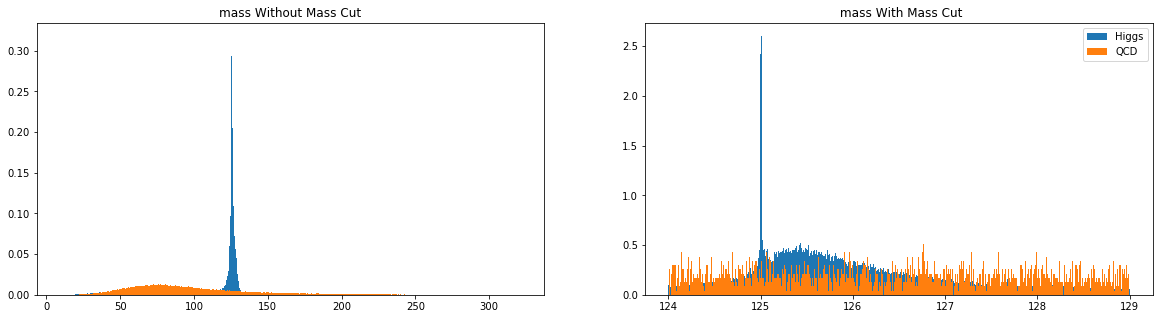

In [13]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('mass Without Mass Cut')
ax[0].hist(higgs['mass'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['mass'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' mass With Mass Cut')
ax[1].hist(masscut_higgs_dict['mass'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['mass'],500, label = 'QCD', density = 'true')
plt.legend()

**ee2**

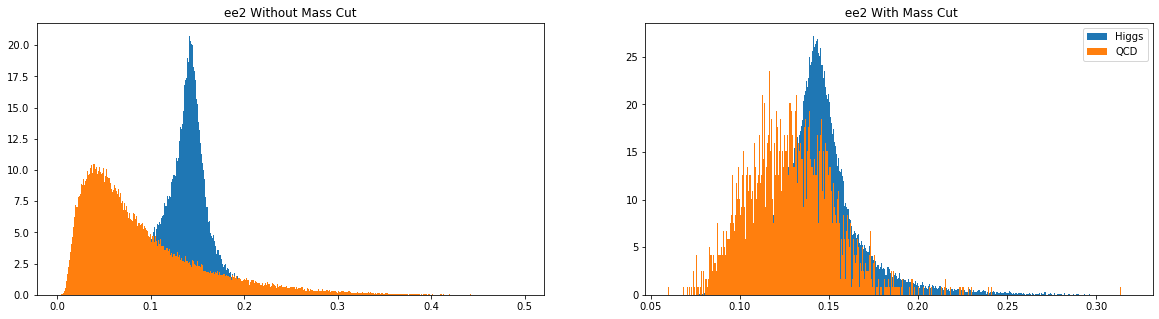

In [14]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('ee2 Without Mass Cut')
ax[0].hist(higgs['ee2'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['ee2'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' ee2 With Mass Cut')
ax[1].hist(masscut_higgs_dict['ee2'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['ee2'],500, label = 'QCD', density = 'true')
plt.legend()

**ee3**

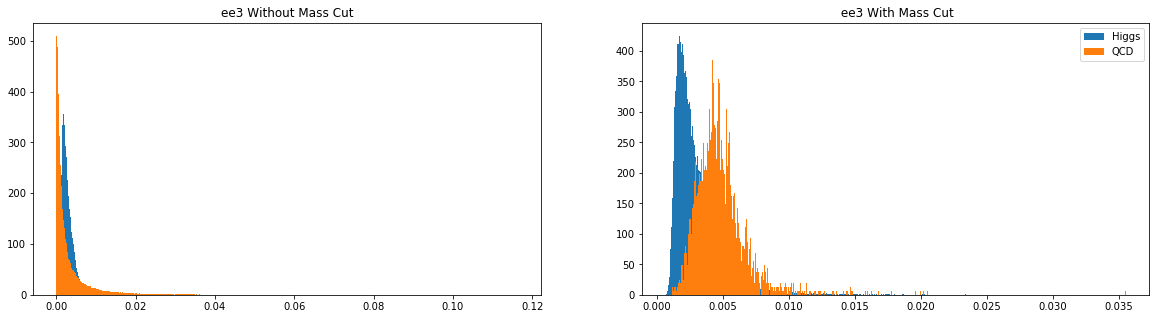

In [15]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('ee3 Without Mass Cut')
ax[0].hist(higgs['ee3'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['ee3'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' ee3 With Mass Cut')
ax[1].hist(masscut_higgs_dict['ee3'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['ee3'],500, label = 'QCD', density = 'true')
plt.legend()

**d2**

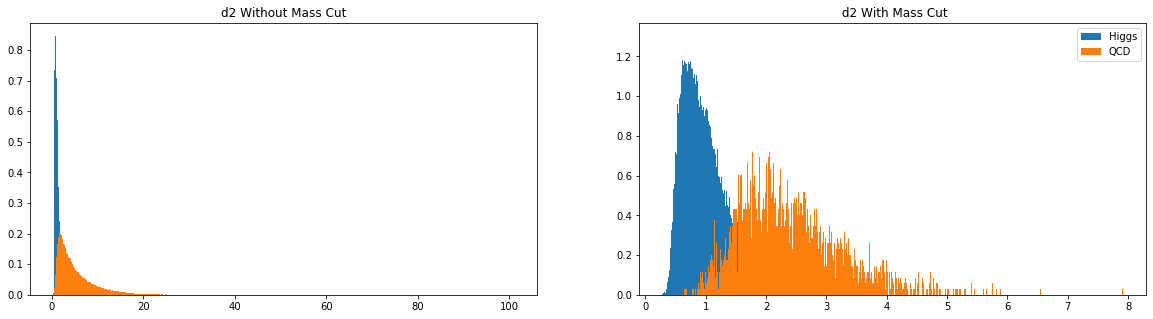

In [16]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('d2 Without Mass Cut')
ax[0].hist(higgs['d2'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['d2'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' d2 With Mass Cut')
ax[1].hist(masscut_higgs_dict['d2'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['d2'],500, label = 'QCD', density = 'true')
plt.legend()

**angularity**

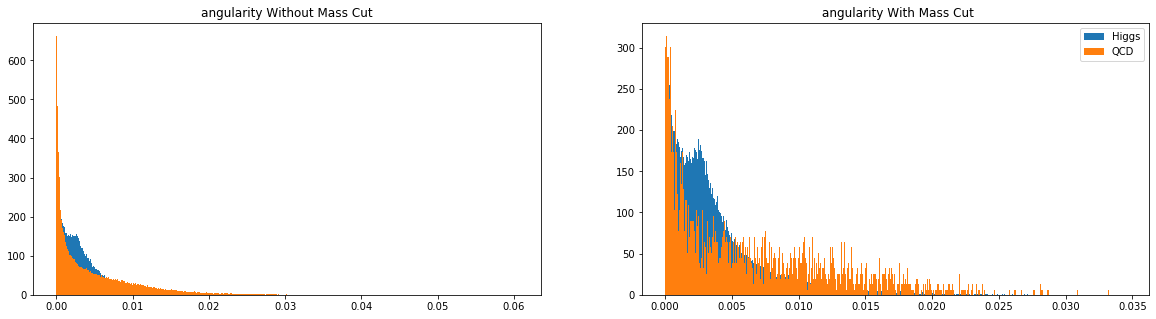

In [17]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('angularity Without Mass Cut')
ax[0].hist(higgs['angularity'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['angularity'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' angularity With Mass Cut')
ax[1].hist(masscut_higgs_dict['angularity'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['angularity'],500, label = 'QCD', density = 'true')
plt.legend()

**t1**

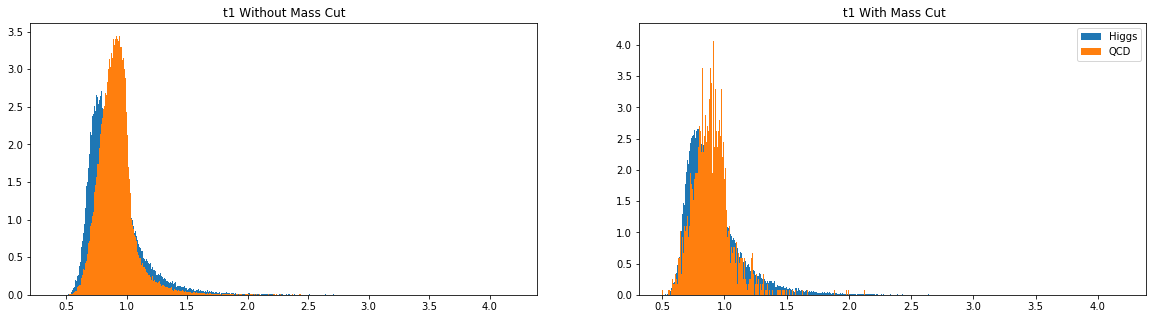

In [18]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('t1 Without Mass Cut')
ax[0].hist(higgs['t1'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['t1'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' t1 With Mass Cut')
ax[1].hist(masscut_higgs_dict['t1'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['t1'],500, label = 'QCD', density = 'true')
plt.legend()

**t2**

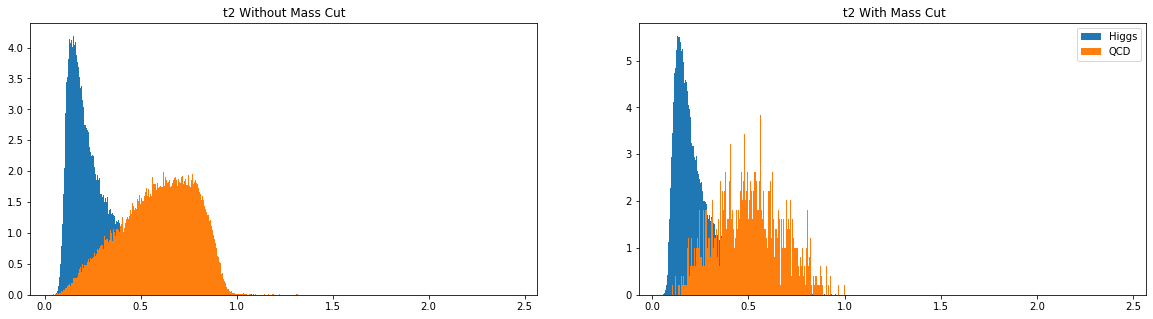

In [19]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('t2 Without Mass Cut')
ax[0].hist(higgs['t2'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['t2'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' t2 With Mass Cut')
ax[1].hist(masscut_higgs_dict['t2'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['t2'],500, label = 'QCD', density = 'true')
plt.legend()

**t3**

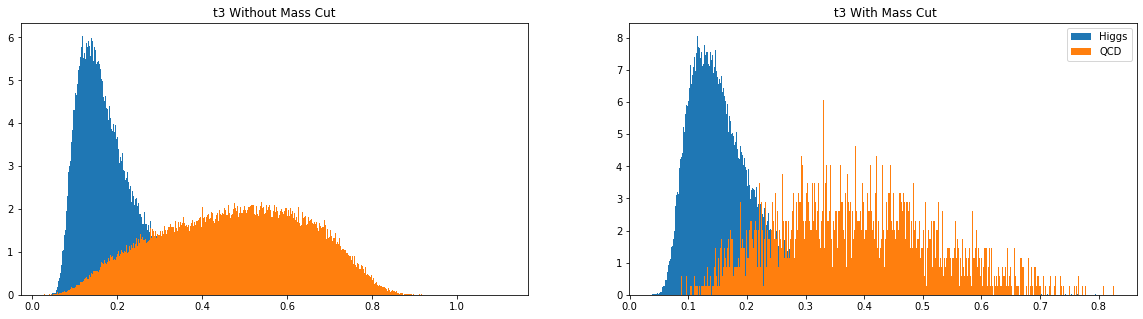

In [20]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('t3 Without Mass Cut')
ax[0].hist(higgs['t3'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['t3'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' t3 With Mass Cut')
ax[1].hist(masscut_higgs_dict['t3'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['t3'],500, label = 'QCD', density = 'true')
plt.legend()

**t21**

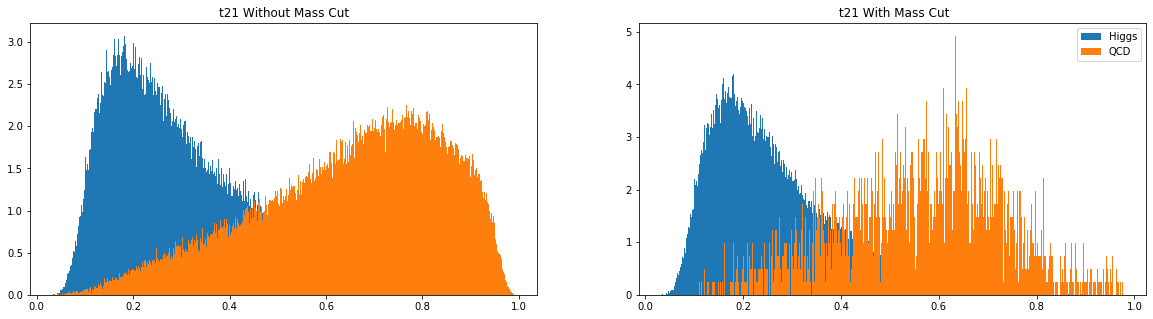

In [21]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('t21 Without Mass Cut')
ax[0].hist(higgs['t21'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['t21'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' t21 With Mass Cut')
ax[1].hist(masscut_higgs_dict['t21'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['t21'],500, label = 'QCD', density = 'true')
plt.legend()

**t32**

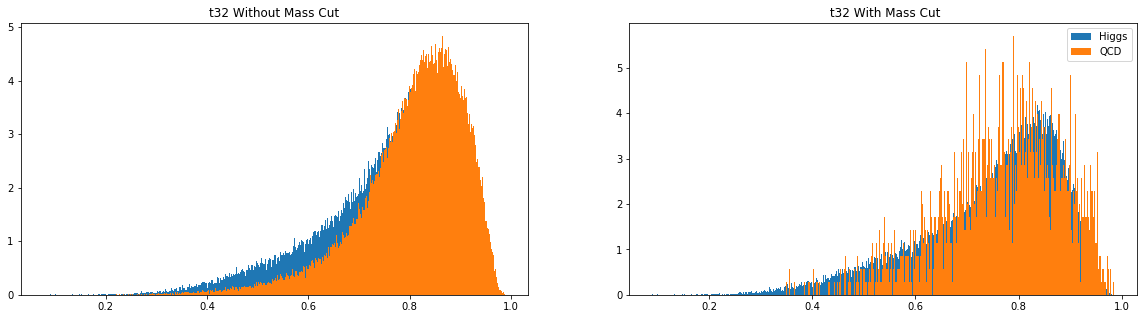

In [22]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('t32 Without Mass Cut')
ax[0].hist(higgs['t32'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['t32'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' t32 With Mass Cut')
ax[1].hist(masscut_higgs_dict['t32'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['t32'],500, label = 'QCD', density = 'true')
plt.legend()

**KtDeltaR**

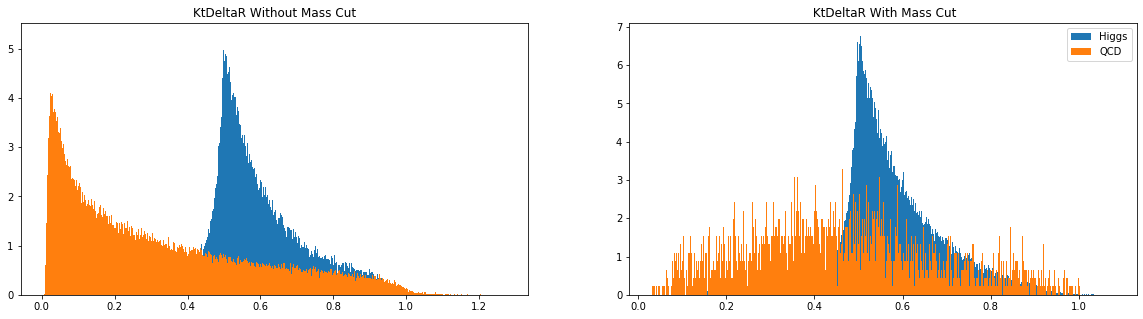

In [23]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('KtDeltaR Without Mass Cut')
ax[0].hist(higgs['KtDeltaR'],500, label = 'Higgs',density = 'true')
ax[0].hist(qcd['KtDeltaR'],500, label = 'QCD',density = 'ture')
ax[1].set_title(' KtDeltaR With Mass Cut')
ax[1].hist(masscut_higgs_dict['KtDeltaR'],500, label = "Higgs", density = 'true')
ax[1].hist(masscut_qcd_dict['KtDeltaR'],500, label = 'QCD', density = 'true')
plt.legend()


By comparing the plots for different features without masscut. t2, and t3, t21, which are "N - subjetiness" jet shape variables has a potential to be good features to discriminate higgs from qcd background, because their main part of the histogram are offset (comparing qcd and higgs) by a great amount. 2-Point ECF (ee2) is also a good feature. But based on my observation, mass is still the best one.

By comparing the plots for different features after masscut. d2,t2,t3, t21 has the great potential to be the features that can further improve the significance after masscut, because their main parts of the histograms after the masscut still have offset(comparing qcd and higgs).

**4. Optimize event selections using multiple features (if necessary)**
    
    - Find a set of feature cuts which can help you to  achieve the best significance.
    
    - Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.

In [24]:
qcdee2 = masscut_qcd_dict['ee2']
higgsee2 = masscut_higgs_dict['ee2']
qcdd2 = masscut_qcd_dict['d2']
higgsd2 = masscut_higgs_dict['d2']

In [25]:
def cutonee2(upper):
    qcdee2cut = len(qcdee2[qcdee2 < upper])
    higgsee2cut = len(higgsee2[higgsee2 < upper])
    qcdmu = 20000 * (qcdee2cut/len(qcdmass))
    higgsmu = 100 * (higgsee2cut/len(higgsmass))
    p = stats.poisson.cdf(qcdmu+higgsmu, qcdmu)
    sigma = stats.norm.ppf(p)
    return sigma

In [26]:
# second cut on ee2, here I chose 0.5 to be my initial guess
for i in range(14):
    print([cutonee2(0.5 - i/30),0.5-i/30])

[2.9560007504111825, 0.5]
[2.9560007504111825, 0.4666666666666667]
[2.9560007504111825, 0.43333333333333335]
[2.9560007504111825, 0.4]
[2.9560007504111825, 0.3666666666666667]
[2.9560007504111825, 0.33333333333333337]
[2.9654435040635727, 0.3]
[2.9654435040635727, 0.26666666666666666]
[2.940123183548354, 0.23333333333333334]
[2.8983144458594348, 0.2]
[2.6447636058414483, 0.16666666666666669]
[1.1519756113643025, 0.13333333333333336]
[0.21795403040159197, 0.09999999999999998]
[0.9105386773865511, 0.06666666666666665]


From the above data, I see two same significances which is 2.9654 with the cut range of [0, 0.3] and [0, 0.2667]

In [27]:
def cutond2(upper):
    qcdd2cut = len(qcdd2[qcdd2 < upper])
    higgsd2cut = len(higgsd2[higgsd2 < upper])
    qcdmu = 20000 * (qcdd2cut/len(qcdmass))
    higgsmu = 100 * (higgsd2cut/len(higgsmass))
    p = stats.poisson.cdf(qcdmu+higgsmu, qcdmu)
    sigma = stats.norm.ppf(p)
    return sigma

In [28]:
# second cut on d2, here I chose 2 to be my initial guess
for i in range(9):
    print([cutond2(2 - i/10),2-i/10])

[4.594169833747455, 2.0]
[4.829182386558339, 1.9]
[5.138023017978852, 1.8]
[5.569684765160445, 1.7]
[5.991568931041873, 1.6]
[6.603290048781358, 1.5]
[7.298758839357407, 1.4]
[7.813749990423569, 1.3]
[8.125890664701908, 1.2]


From the data above, the maxiumum significance is 8.126 with the cut range [0,1.2]

**Comparison**

By comparing the data, the data of ee2 from my partner is 2.14 and the data of d2 from my partner is 1.894. As we can see that I have greater values of ee2 and d2 than that of my partner's. 

**Bonus**

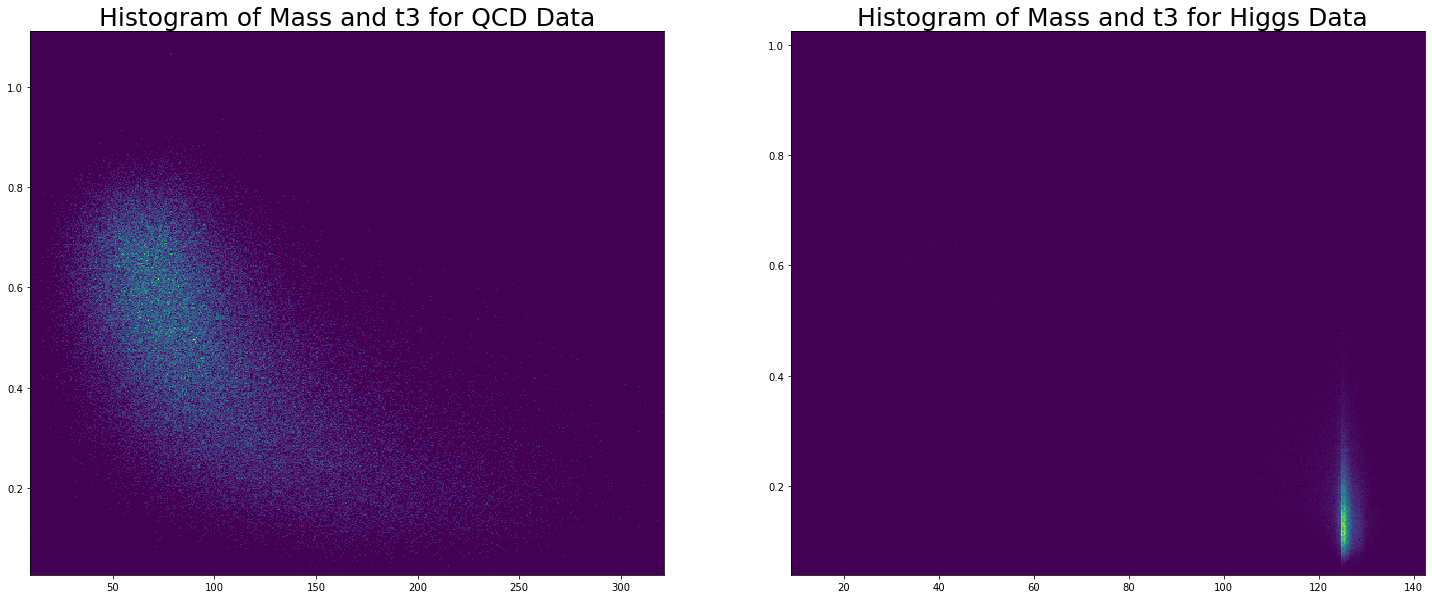

In [29]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.hist2d(qcdmass, qcd['t3'], bins =[500,500])
plt.title('Histogram of Mass and t3 for QCD Data',fontsize=25)
plt.subplot(1,2,2)
plt.title(' Histogram of Mass and t3 for Higgs Data',fontsize=25)
plt.hist2d(higgsmass, higgs['t3'], bins=[500,500])
plt.show()

**Lab 8**

In [30]:

f1 = h5py.File("data_highLumi_pt_250_500.h5", 'r')
f2 = h5py.File("data_lowLumi_pt_250_500.h5", 'r')
high= pandas.read_hdf("data_highLumi_pt_250_500.h5")
low = pandas.read_hdf("data_lowLumi_pt_250_500.h5")
masshigh = high['mass']
masslow = low['mass']
d2high = high['d2']
d2low = low['d2']
ee2high = high['ee2']
ee2low = low['ee2']
data_high = f1.get('data').get('block0_values')
data_low = f2.get('data').get('block0_values')

In [31]:
def masscutlumi (data, lowerBound, upperBound):
    indices = (data > lowerBound) & (data < upperBound)
    values = data[indices]
    return values

**1. High luminosity data**

    - Focus on each feature of your event selection.
    - Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
    - Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
    - Evaluate observed significance and compare your results to expectation

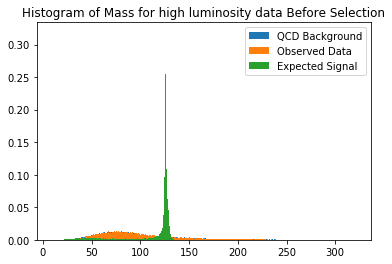

In [32]:
plt.title('Histogram of Mass for high luminosity data Before Selection')
plt.hist(qcdmass,500,label = 'QCD Background',density = 'true')
plt.hist(masshigh, 500, label = 'Observed Data',density = 'true')
plt.hist(higgs['mass'], 500, density = 'true', label = 'Expected Signal')
plt.legend()

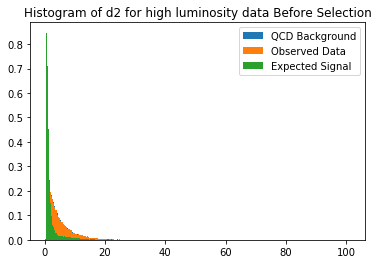

In [33]:
plt.title('Histogram of d2 for high luminosity data Before Selection')
plt.hist(qcd['d2'],500,label = 'QCD Background', density = 'true')
plt.hist(d2high,500, label = 'Observed Data',density = 'true')
plt.hist(higgs['d2'], 500, density = 'true', label = 'Expected Signal')
plt.legend()
plt.show()

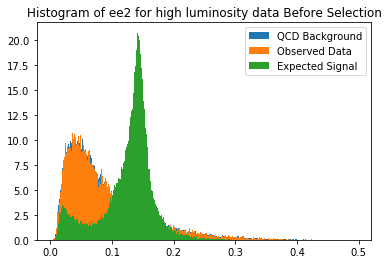

In [34]:
plt.title('Histogram of ee2 for high luminosity data Before Selection')
plt.hist(qcd['ee2'],500,label = 'QCD Background', density = 'true')
plt.hist(ee2high,500, label = 'Observed Data',density = 'true')
plt.hist(higgs['ee2'], 500, density = 'true', label = 'Expected Signal')
plt.legend()
plt.show()

plot with masscut 

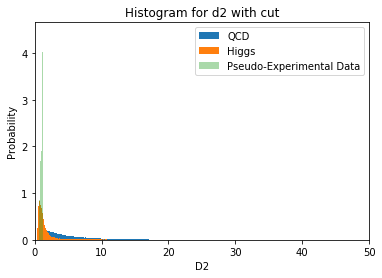

In [35]:
highcutd2 = masscutlumi(data_high[:, 6], 0, 1.2)
plt.hist(qcd['d2'], 500, density=True, label='QCD')
plt.hist(higgs['d2'], 500, density=True, label='Higgs')
plt.hist(highcutd2[:], 500, density=True, alpha = 0.4, label = 'Pseudo-Experimental Data')
plt.title("Histogram for d2 with cut")
plt.ylabel("Probability")
plt.xlabel("D2")
plt.xlim(0,50)
plt.legend()
plt.show()


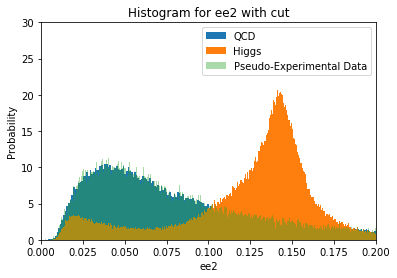

In [36]:
highcutee2 = masscutlumi(data_high[:, 4], 0, 0.3)
plt.hist(qcd['ee2'], 500, density=True, label='QCD')
plt.hist(higgs['ee2'], 500, density=True, label='Higgs')
plt.hist(highcutee2[:], 500, density=True, alpha = 0.4, label = 'Pseudo-Experimental Data')
plt.title("Histogram for ee2 with cut")
plt.ylabel("Probability")
plt.ylim(0, 30)
plt.xlabel("ee2")
plt.xlim(0,0.2)
plt.legend()
plt.show()

By comparing, these are similar.

**2. Low luminosity data**

    - Focus on each feature of your event selection.
    - Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
    - Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
    - Evaluate observed significance and compare your results to expectation

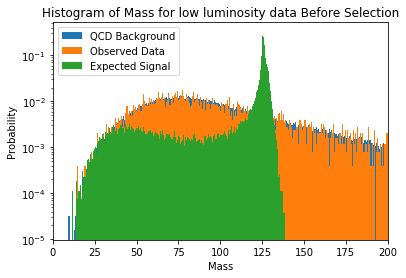

In [37]:
plt.title('Histogram of Mass for low luminosity data Before Selection')
plt.hist(qcdmass,500,label = 'QCD Background',density = 'true')
plt.hist(masslow, 500, label = 'Observed Data',density = 'true')
plt.hist(higgs['mass'], 500, density = 'true', label = 'Expected Signal')
plt.ylabel("Probability")
plt.yscale('log')
plt.xlim(0, 200)
plt.xlabel("Mass")
plt.legend()
plt.show()

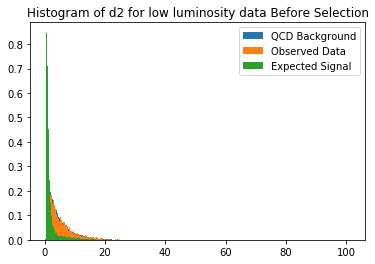

In [38]:
plt.title('Histogram of d2 for low luminosity data Before Selection')
plt.hist(qcd['d2'],500,label = 'QCD Background', density = 'true')
plt.hist(d2low,500, label = 'Observed Data',density = 'true')
plt.hist(higgs['d2'], 500, density = 'true', label = 'Expected Signal')
plt.legend()
plt.show()

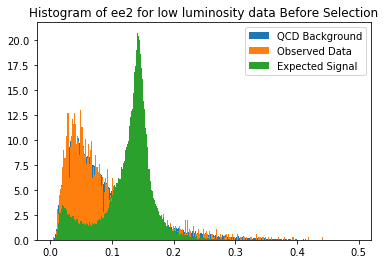

In [39]:
plt.title('Histogram of ee2 for low luminosity data Before Selection')
plt.hist(qcd['ee2'],500,label = 'QCD Background', density = 'true')
plt.hist(ee2low,500, label = 'Observed Data',density = 'true')
plt.hist(higgs['ee2'], 500, density = 'true', label = 'Expected Signal')
plt.legend()
plt.show()

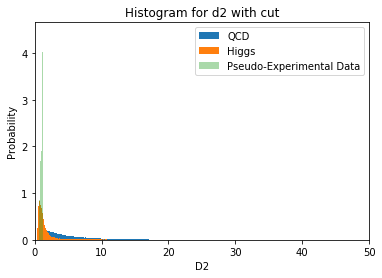

In [40]:
lowcutd2 = masscutlumi(data_low[:, 6], 0, 1.2)
plt.hist(qcd['d2'], 500, density=True, label='QCD')
plt.hist(higgs['d2'], 500, density=True, label='Higgs')
plt.hist(highcutd2[:], 500, density=True, alpha = 0.4, label = 'Pseudo-Experimental Data')
plt.title("Histogram for d2 with cut")
plt.ylabel("Probability")
plt.xlabel("D2")
plt.xlim(0,50)
plt.legend()
plt.show()


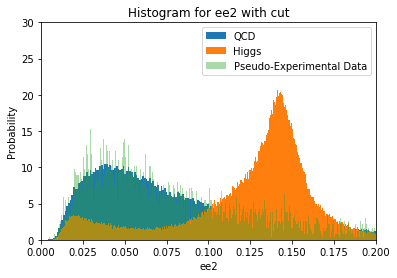

In [41]:
lowcutee2 = masscutlumi(data_low[:, 4], 0, 0.3)
plt.hist(qcd['ee2'], 500, density=True, label='QCD')
plt.hist(higgs['ee2'], 500, density=True, label='Higgs')
plt.hist(lowcutee2[:], 500, density=True, alpha = 0.4, label = 'Pseudo-Experimental Data')
plt.title("Histogram for ee2 with cut")
plt.ylabel("Probability")
plt.ylim(0, 30)
plt.xlabel("ee2")
plt.xlim(0,0.2)
plt.legend()
plt.show()

**3. 95% Confidence Level of signal yields**

    - In the low luminosity data, the observed significance is less than 5 σ . We will calculate the 95% confidence level upper limit of signal yield.
    - Evaluate the expected 95% confidence level upper limit
    - Evaluate the observed 95% confidence level upper limit
    - Compare expectation to observation. Comment on your finding.

In [48]:
r = len(high['mass'])/100000
masscutlow124_125 = (low['mass'] > 124) & (low['mass']<129)
masscutlowsel = low[masscutlow124_125]
masslowsel = masscutlowsel['mass']
d2withmasscut2 = masscutlowsel['d2']
d2lowsel= d2withmasscut2[d2withmasscut2 < 1.2]
higgslowobserved = len(d2lowsel)
masscuthigh124_125 = (high['mass'] > 124) & (high['mass']<129)
masscuthighsel = high[masscuthigh124_125]
masshighsel = masscuthighsel['mass']
d2withmasscut = masscuthighsel['d2']
d2highsel= d2withmasscut[d2withmasscut < 1.2]
higgshighobserved = len(d2highsel)
higgsexpected = 100*r*(len(higgsd2[higgsd2<1.2])/100000)
p_upperbound_exp = stats.poisson.ppf(0.95, higgsexpected)
p_upperbound_obs = stats.poisson.ppf(0.95,higgslowobserved)
print('the expected signal strength is ', higgsexpected)
print('the upper bound of 95% confidence interval for observed value is ',p_upperbound_obs)
print('the upper bound of 95% confidence interval for expected value is ', p_upperbound_exp)

the expected signal strength is  19.16501376
the upper bound of 95% confidence interval for observed value is  15.0
the upper bound of 95% confidence interval for expected value is  27.0


From the data shown above, we can see that the expected value is bigger than that of expected value.